## Importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

## Helping functions

In [2]:
def plotall(loss_history, thetas_history):

    # number of thetas
    n_thetas = thetas_history.shape[1]

    # plot loss vs iterations
    plt.plot(loss_history, '-m.', markersize=12)
    plt.grid("True")
    plt.xlabel("iterations")
    plt.ylabel("loss")
    plt.show()

    # plot loss vs thetas
    fig, axes = plt.subplots(nrows=n_thetas,
                             ncols=1,
                             figsize=(6, 6 * n_thetas))
    plt.suptitle("Loss vs thetas")
    for i in range(0, n_thetas):
        axes[i].grid()
        axes[i].plot(thetas_history[:, i], loss_history, '-m.', markersize=12)
        axes[i].set_title(f"Theta {i}")
        axes[i].set_xlabel(f"Theta{i}")
        axes[i].set_ylabel("loss")
    plt.show()

In [3]:
def minmaxscale(x):
    scaler = MinMaxScaler()
    return scaler.fit_transform(x)

In [4]:
def chunker(data, size):
    return (data[pos:pos + size, :] for pos in range(0, data.shape[0], size))

## The data

In [6]:
a1 = np.linspace(0, 20)
a2 = np.linspace(10, 100)
a3 = np.linspace(-7, -15)
x1 = np.column_stack((a1, a2, a3))
y1 = a1 + 2 * a2 + 3 * a3

In [7]:
data = np.genfromtxt('MultiVarLR.csv', delimiter=',')
x2 = data[:, :-1]
y2 = data[:, -1]

# Adaptive Gradient Algorithm (Adagrad)

In [8]:
def Adagrad(x,
            y,
            lr,
            epsilon=1e-08,
            max_epochs=500,
            scale=False,
            batch_size=5,
            gra_threshold=.01,
            conv_threshold=.01):
    # scale or not
    if scale == True:
        x = minmaxscale(x)

    # Concatinate data
    data = np.column_stack((x, y))

    # Shuffle data
    np.random.shuffle(data)

    # append column of ones
    data = np.column_stack((np.ones(x.shape[0]), data))

    # number of rows and columns and batches
    n, m = data.shape[0], (data.shape[1] - 1)
    n_batches = len(y) // batch_size

    # initializing thetas, loss history, thetas_history, vt_old
    thetas = np.zeros(m)
    loss_history = [np.inf]
    thetas_history = np.array(thetas)
    vt_old = np.zeros(m)

    for i in range(1, max_epochs + 1):
        print(f"****************** Epoch {i} ********************\n")
        for chunk in chunker(data, batch_size):
            x = chunk[:, :-1]
            y = chunk[:, -1]
            y_pred = x @ thetas
            error = y_pred - y
            j = .5 * (1 / batch_size) * (np.linalg.norm(error)**2)
            loss_history.append(j)
            gradient = (1 / batch_size) * x.T @ error
            gradient_norm = np.linalg.norm(gradient)
            vt_new = vt_old + np.square(gradient)
            vt_new_norm = np.linalg.norm(vt_new)
            thetas = thetas - ((lr / (np.sqrt(vt_new) + epsilon)) * gradient)
            vt_old = vt_new
            thetas_history = np.row_stack((thetas_history, thetas))
        convergence = np.abs(loss_history[-1] - loss_history[-(n_batches + 1)])
        print(f"Cost= {j}")
        print(f"Gradient vector: {gradient}")
        print(f"Gradient Vector Norm: {gradient_norm}")
        print(f"Momentum Vector Norm:{vt_new_norm}")
        print(f"Thetas: {thetas}")

        if gradient_norm < gra_threshold or convergence < conv_threshold:
            print(f"****************** Training Report ********************\n")
            print(f"Gradient Descent converged after {i} epochs\n")
            print(f"thetas_Opt= {thetas}\n")
            print(f"Cost:{j}\n")
            break

    return thetas, loss_history[1:], thetas_history[:-1, :]

# Example 1

In [38]:
np.random.seed(1)
thetas, loss_history, thetas_history = Adagrad(x1,
                                               y1,
                                               lr=1,
                                               max_epochs=500,
                                               batch_size=5,
                                               scale=False,
                                               gra_threshold=.001,
                                               conv_threshold=.001)

****************** Epoch 1 ********************

Cost= 79.2562581781803
Gradient vector: [   2.03577161  -58.14997754 -241.31718277    9.00958971]
Gradient Vector Norm: 248.3962955851749
Momentum Vector Norm:60759705.629733175
Thetas: [ 0.74769577  1.24856756  1.18190098 -0.97392146]
****************** Epoch 2 ********************

Cost= 68.59813752062938
Gradient vector: [   1.91650395  -53.87545198 -223.27449439    8.13465312]
Gradient Vector Norm: 229.83452686372297
Momentum Vector Norm:61260689.234173425
Thetas: [ 0.35165926  1.33830677  1.20619246 -0.79477029]
****************** Epoch 3 ********************

Cost= 59.454915301244505
Gradient vector: [   1.8019368   -49.98085293 -206.89447015    7.37878355]
Gradient Vector Norm: 212.98145661535003
Momentum Vector Norm:61694386.29515742
Thetas: [-0.01149225  1.42144005  1.22860051 -0.62894951]
****************** Epoch 4 ********************

Cost= 51.58950785556476
Gradient vector: [   1.69260583  -46.41769782 -191.95358189    6.718

In [40]:
y_pred = np.column_stack((np.ones(x1.shape[0]), x1)) @ thetas
print(f"r2_score: {r2_score(y1,y_pred)}")

r2_score: 0.9999961455149236


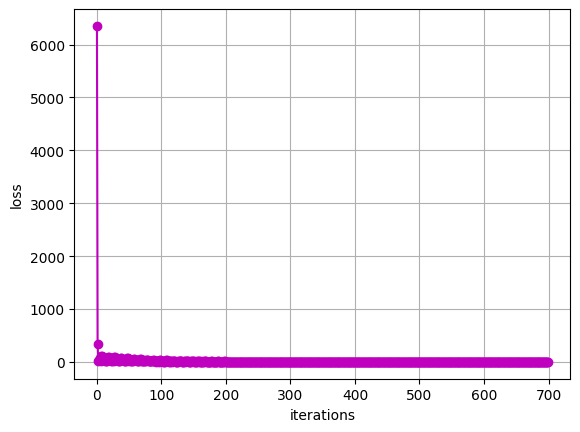

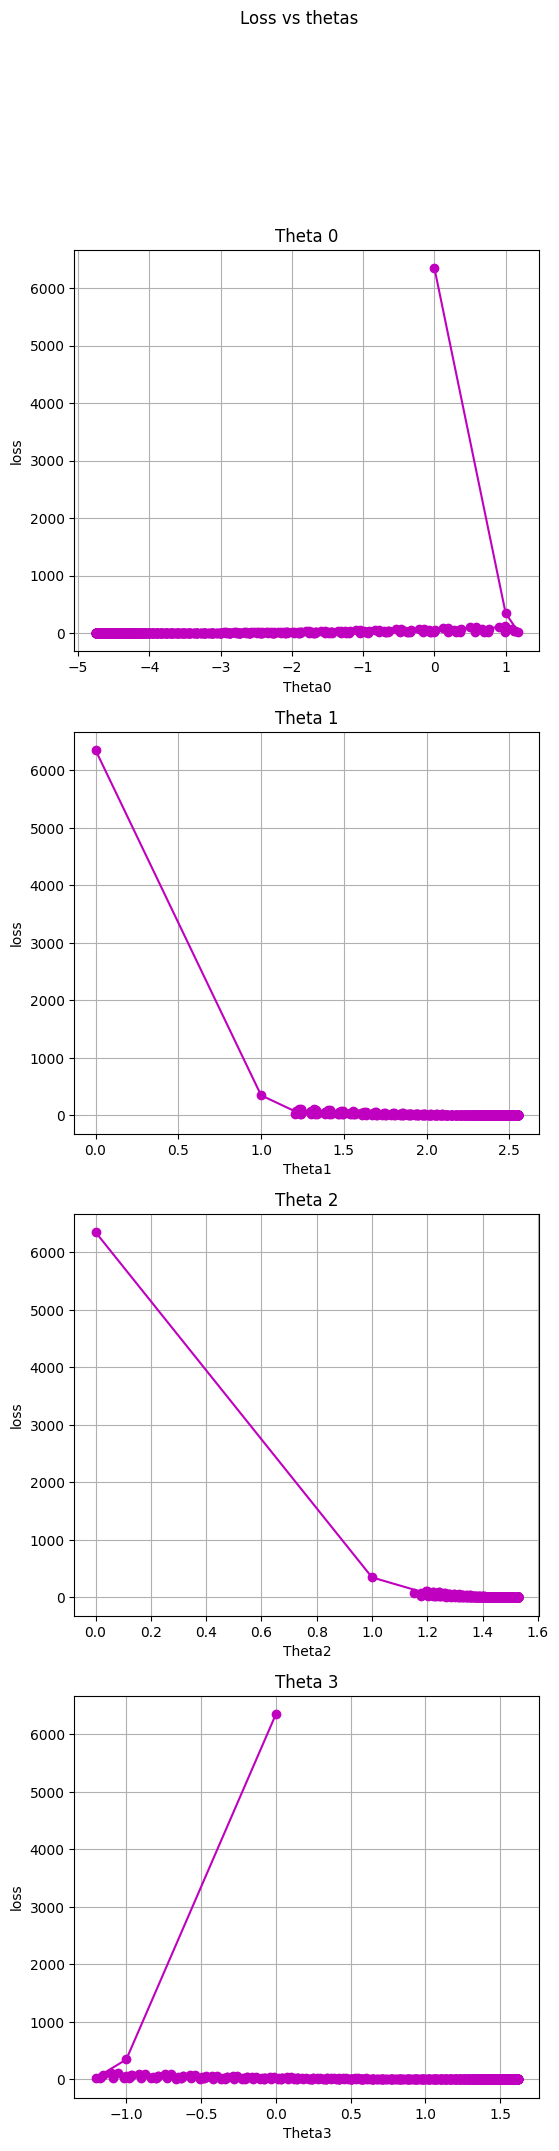

In [41]:
plotall(loss_history, thetas_history)

# Example 2

In [44]:
np.random.seed(1)
thetas, loss_history, thetas_history = Adagrad(x2,
                                               y2,
                                               lr=.1,
                                               max_epochs=500,
                                               batch_size=5,
                                               scale=False,
                                               gra_threshold=.001,
                                               conv_threshold=.001)

****************** Epoch 1 ********************

Cost= 4803.292711304334
Gradient vector: [  -96.14459759 -7608.79661171 -7112.69028976 -7913.91435849]
Gradient Vector Norm: 13081.415569183026
Momentum Vector Norm:1001351768.9171169
Thetas: [0.28592096 0.28255718 0.27945111 0.28029067]
****************** Epoch 2 ********************

Cost= 2194.493939365107
Gradient vector: [  -64.90994304 -5139.78284186 -4801.87666891 -5348.90194417]
Gradient Vector Norm: 8836.874589692337
Momentum Vector Norm:1393376058.2214715
Thetas: [0.41037598 0.40644369 0.40256144 0.40391305]
****************** Epoch 3 ********************

Cost= 1092.8909419832337
Gradient vector: [  -45.7218346  -3623.0100809  -3382.28724945 -3773.15689668]
Gradient Vector Norm: 6229.355708036728
Momentum Vector Norm:1582251846.3209467
Thetas: [0.4889171  0.48466895 0.48034618 0.4820613 ]
****************** Epoch 4 ********************

Cost= 562.8667600524606
Gradient vector: [  -32.71057674 -2594.50186263 -2419.67804623 -270

In [45]:
y_pred2 = np.column_stack((np.ones(x2.shape[0]), x2)) @ thetas
print(f"r2_score: {r2_score(y2,y_pred2)}")

r2_score: 0.9782388035969105


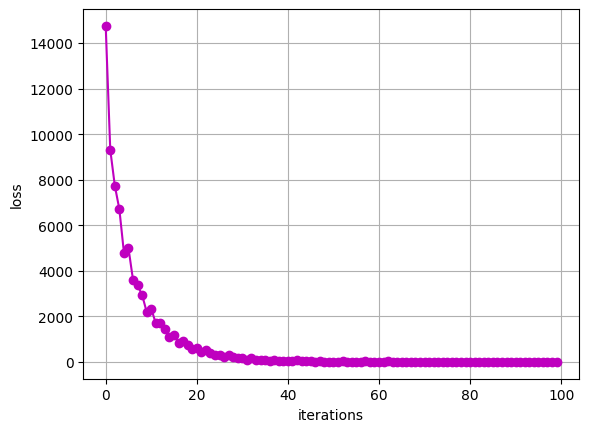

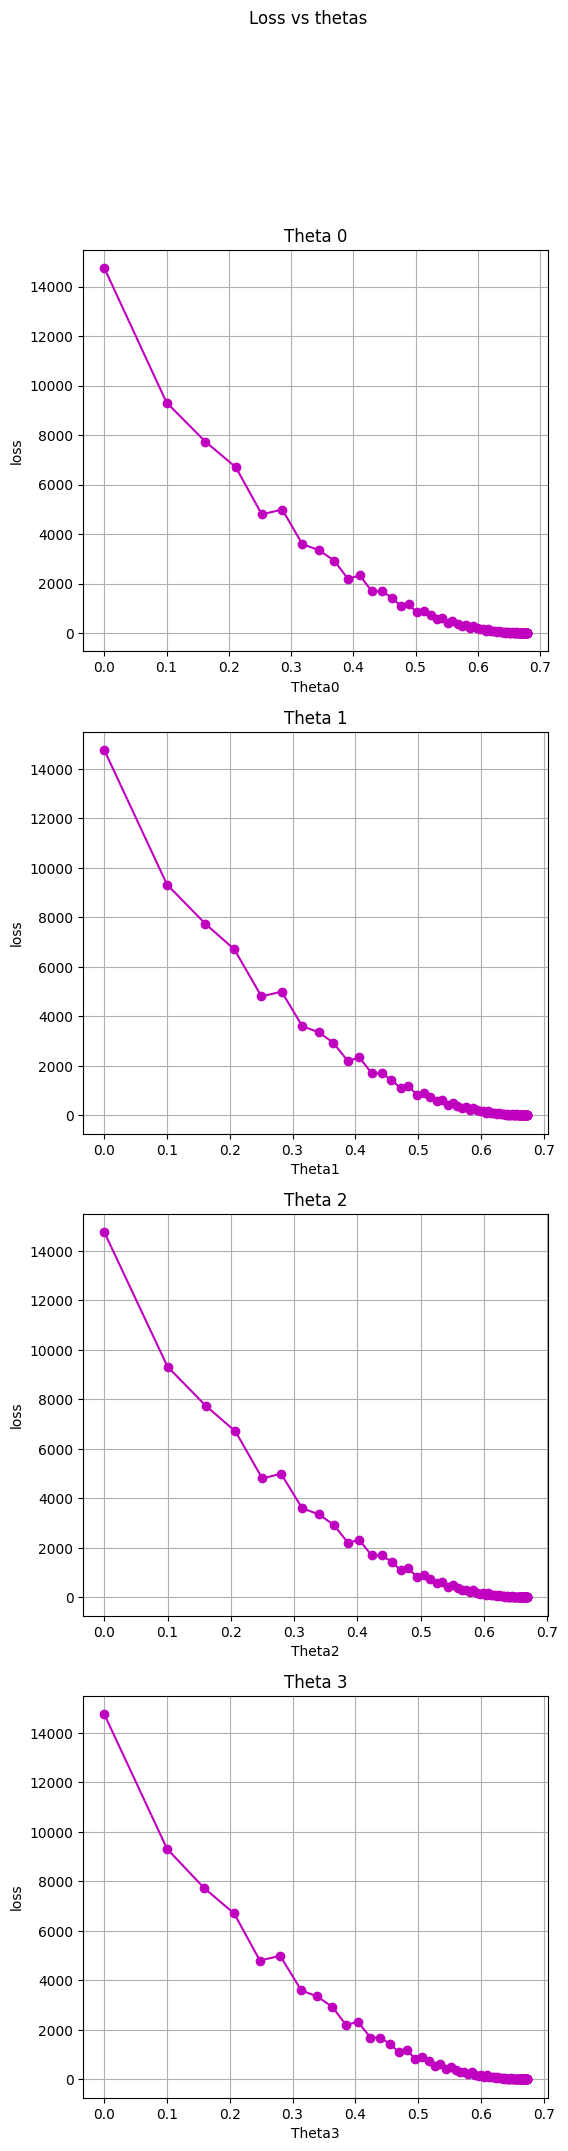

In [46]:
plotall(loss_history, thetas_history)

# Root Mean Squared Propagation (RMS Prop)

In [47]:
def RMS_prop(x,
             y,
             lr,
             beta,
             epsilon=1e-08,
             max_epochs=500,
             scale=False,
             batch_size=5,
             gra_threshold=.01,
             conv_threshold=.01):
    # scale or not
    if scale == True:
        x = minmaxscale(x)

    # Concatinate data
    data = np.column_stack((x, y))

    # Shuffle data
    np.random.shuffle(data)

    # append column of ones
    data = np.column_stack((np.ones(x.shape[0]), data))

    # number of rows and columns and batches
    n, m = data.shape[0], (data.shape[1] - 1)
    n_batches = len(y) // batch_size

    # initializing thetas, loss history, thetas_history, vt_old
    thetas = np.zeros(m)
    loss_history = [np.inf]
    thetas_history = np.array(thetas)
    vt_old = np.zeros(m)

    for i in range(1, max_epochs + 1):
        print(f"****************** Epoch {i} ********************\n")
        for chunk in chunker(data, batch_size):
            x = chunk[:, :-1]
            y = chunk[:, -1]
            y_pred = x @ thetas
            error = y_pred - y
            j = .5 * (1 / batch_size) * (np.linalg.norm(error)**2)
            loss_history.append(j)
            gradient = (1 / batch_size) * x.T @ error
            gradient_norm = np.linalg.norm(gradient)
            vt_new = (beta * vt_old) + ((1 - beta) * np.square(gradient))
            vt_new_norm = np.linalg.norm(vt_new)
            thetas = thetas - ((lr / (np.sqrt(vt_new) + epsilon)) * gradient)
            vt_old = vt_new
            thetas_history = np.row_stack((thetas_history, thetas))
        convergence = np.abs(loss_history[-1] - loss_history[-(n_batches + 1)])
        print(f"Cost= {j}")
        print(f"Gradient vector: {gradient}")
        print(f"Gradient Vector Norm: {gradient_norm}")
        print(f"Momentum Vector Norm:{vt_new_norm}")
        print(f"Thetas: {thetas}")

        if gradient_norm < gra_threshold or convergence < conv_threshold:
            print(f"****************** Training Report ********************\n")
            print(f"Gradient Descent converged after {i} epochs\n")
            print(f"thetas_Opt= {thetas}\n")
            print(f"Cost:{j}\n")
            break

    return thetas, loss_history[1:], thetas_history[:-1, :]

# Example 3

In [48]:
np.random.seed(1)
thetas, loss_history, thetas_history = RMS_prop(x1,
                                                y1,
                                                lr=.2,
                                                beta=.25,
                                                max_epochs=500,
                                                batch_size=5,
                                                scale=True,
                                                gra_threshold=.001,
                                                conv_threshold=.001)

****************** Epoch 1 ********************

Cost= 4109.114192065935
Gradient vector: [-73.13812467 -48.97819011 -48.97819011 -24.15993457]
Gradient Vector Norm: 103.58867665321387
Momentum Vector Norm:5276.398597389402
Thetas: [1.94190731 1.85181457 1.85181457 1.99052562]
****************** Epoch 2 ********************

Cost= 3754.0750878755352
Gradient vector: [-68.52264818 -46.76283515 -46.76283515 -21.75981303]
Gradient Vector Norm: 97.68504633824203
Momentum Vector Norm:4655.341240900675
Thetas: [3.85223656 3.68195764 3.68195764 3.93358557]
****************** Epoch 3 ********************

Cost= 3422.2559571435263
Gradient vector: [-63.93428957 -44.55899281 -44.55899281 -19.37529676]
Gradient Vector Norm: 91.83682914000478
Momentum Vector Norm:4081.8874922962864
Thetas: [5.74935632 5.50678772 5.50678772 5.86049086]
****************** Epoch 4 ********************

Cost= 3113.682142204487
Gradient vector: [-59.38165339 -42.36981125 -42.36981125 -17.01184213]
Gradient Vector Norm:

In [49]:
y_pred = np.column_stack((np.ones(x1.shape[0]), minmaxscale(x1))) @ thetas
print(f"r2_score: {r2_score(y1,y_pred)}")

r2_score: 0.9999688522658521


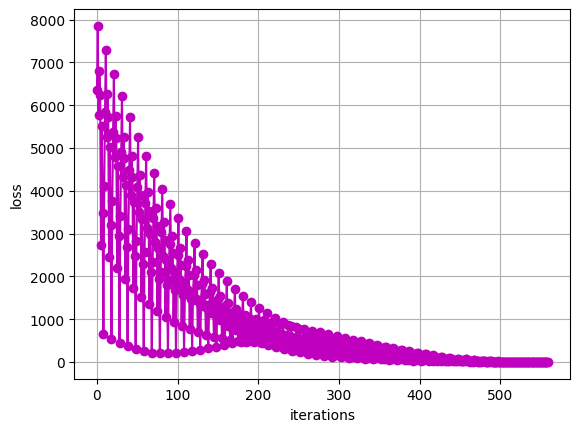

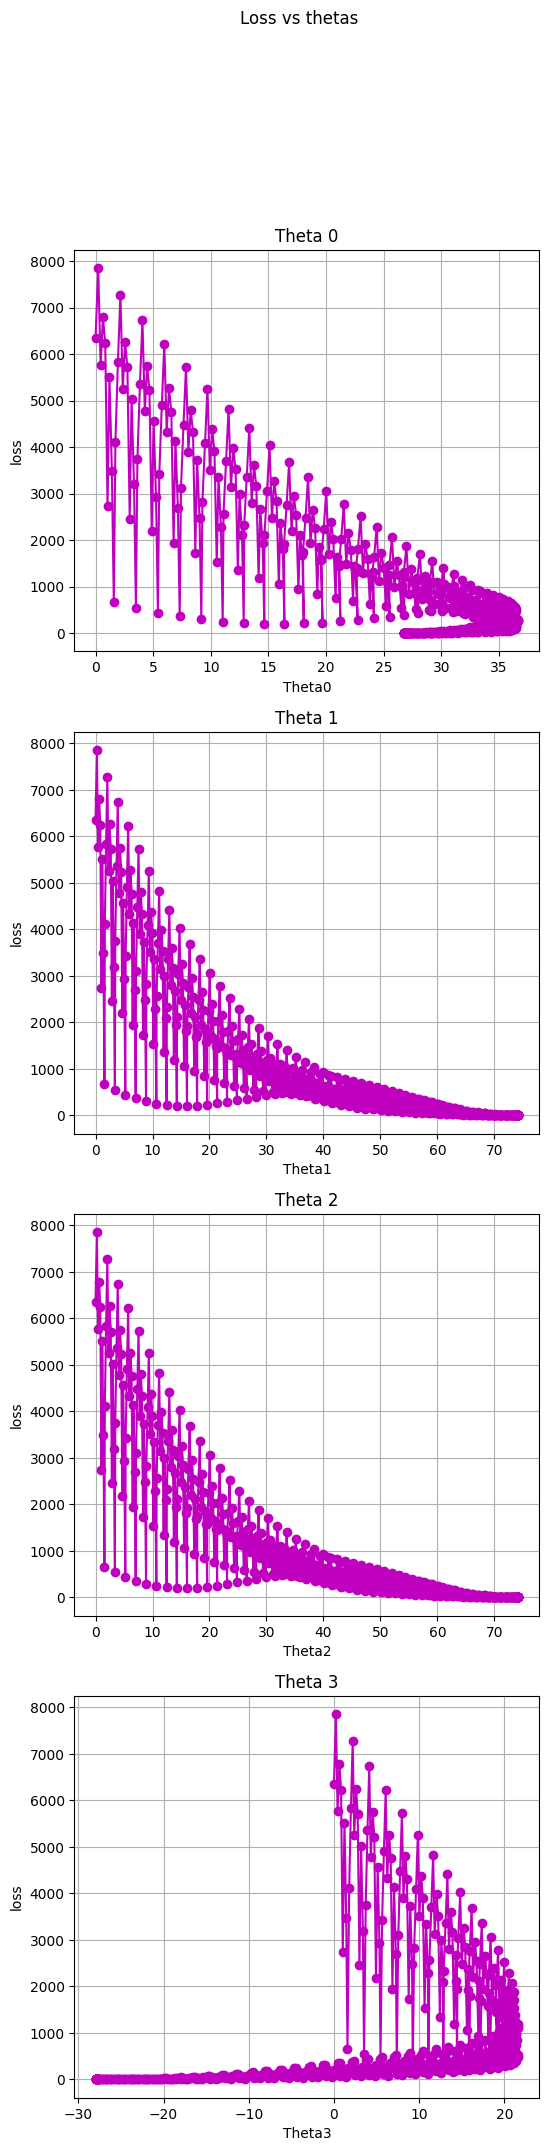

In [50]:
plotall(loss_history, thetas_history)

# Example 4

In [51]:
np.random.seed(42)
thetas, loss_history, thetas_history = RMS_prop(x2,
                                                y2,
                                                lr=.01,
                                                beta=.9,
                                                max_epochs=500,
                                                batch_size=5,
                                                scale=False,
                                                gra_threshold=.001,
                                                conv_threshold=.001)

****************** Epoch 1 ********************

Cost= 7561.400913376961
Gradient vector: [ -122.34161548 -8274.78274015 -8818.61036068 -9010.85324566]
Gradient Vector Norm: 15081.45754812266
Momentum Vector Norm:107956829.183661
Thetas: [0.10472007 0.10490367 0.10584996 0.10642563]
****************** Epoch 2 ********************

Cost= 5991.376932355857
Gradient vector: [ -108.92512966 -7364.70180593 -7849.55312123 -8021.09225424]
Gradient Vector Norm: 13424.012162099796
Momentum Vector Norm:146366506.8004816
Thetas: [0.16613049 0.16551055 0.16663353 0.16724765]
****************** Epoch 3 ********************

Cost= 4838.433806236325
Gradient vector: [  -97.90582697 -6617.22628586 -7053.6394366  -7208.1747119 ]
Gradient Vector Norm: 12062.7062157666
Momentum Vector Norm:152868903.8709777
Thetas: [0.21775113 0.21643341 0.21766231 0.21830454]
****************** Epoch 4 ********************

Cost= 3903.721222197975
Gradient vector: [  -87.96183504 -5942.69166198 -6335.39365841 -6474.5846

In [52]:
y_pred2 = np.column_stack((np.ones(x2.shape[0]), x2)) @ thetas
print(f"r2_score: {r2_score(y2,y_pred2)}")

r2_score: 0.9810931648038205


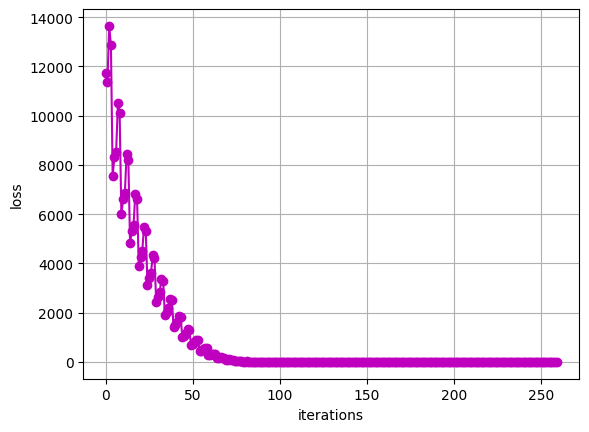

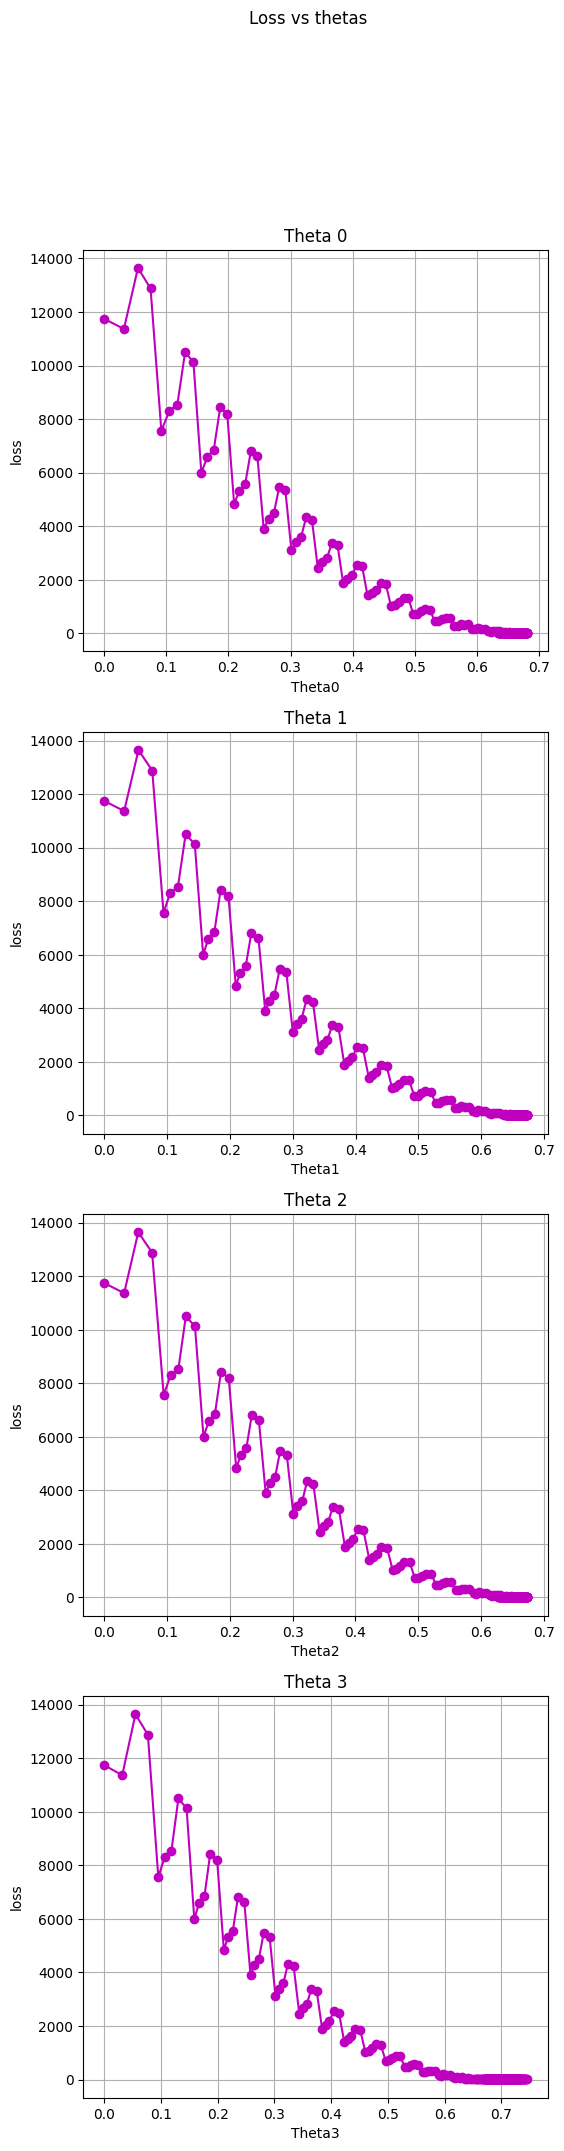

In [53]:
plotall(loss_history, thetas_history)

# Adam

In [55]:
def Adam(x,
         y,
         lr,
         beta1,
         beta2,
         epsilon=1e-08,
         max_epochs=500,
         scale=False,
         batch_size=5,
         gra_threshold=.01,
         conv_threshold=.01):
    # scale or not
    if scale == True:
        x = minmaxscale(x)

    # Concatinate data
    data = np.column_stack((x, y))

    # Shuffle data
    np.random.shuffle(data)

    # append column of ones
    data = np.column_stack((np.ones(x.shape[0]), data))

    # number of rows and columns and batches
    n, m = data.shape[0], (data.shape[1] - 1)
    n_batches = len(y) // batch_size

    # initializing thetas, loss history, thetas_history, vt_old, mt_old
    thetas = np.zeros(m)
    loss_history = [np.inf]
    thetas_history = np.array(thetas)
    vt_old = np.zeros(m)
    mt_old = np.zeros(m)

    for i in range(1, max_epochs + 1):
        print(f"****************** Epoch {i} ********************\n")
        for chunk in chunker(data, batch_size):
            x = chunk[:, :-1]
            y = chunk[:, -1]
            y_pred = x @ thetas
            error = y_pred - y
            j = .5 * (1 / batch_size) * (np.linalg.norm(error)**2)
            loss_history.append(j)
            gradient = (1 / batch_size) * x.T @ error
            gradient_norm = np.linalg.norm(gradient)
            mt_new = (beta1 * mt_old) + ((1 - beta1) * gradient)
            vt_new = (beta2 * vt_old) + ((1 - beta2) * np.square(gradient))
            vt_new_norm = np.linalg.norm(vt_new)
            mt_hat = mt_new / (1 - (beta1**i))
            vt_hat = vt_new / (1 - (beta2**i))
            thetas = thetas - ((lr / (np.sqrt(vt_hat) + epsilon)) * mt_hat)
            vt_old = vt_new
            mt_old = mt_new
            thetas_history = np.row_stack((thetas_history, thetas))
        convergence = np.abs(loss_history[-1] - loss_history[-(n_batches + 1)])
        print(f"Cost= {j}")
        print(f"Gradient vector: {gradient}")
        print(f"Gradient Vector Norm: {gradient_norm}")
        print(f"Momentum Vector Norm:{vt_new_norm}")
        print(f"Thetas: {thetas}")

        if gradient_norm < gra_threshold or convergence < conv_threshold:
            print(f"****************** Training Report ********************\n")
            print(f"Gradient Descent converged after {i} epochs\n")
            print(f"thetas_Opt= {thetas}\n")
            print(f"Cost:{j}\n")
            break

    return thetas, loss_history[1:], thetas_history[:-1, :]

# Example 5

In [62]:
np.random.seed(1)
thetas, loss_history, thetas_history = Adam(x1,
                                            y1,
                                            lr=.5,
                                            beta1=.5,
                                            beta2=.5,
                                            max_epochs=500,
                                            batch_size=5,
                                            scale=True,
                                            gra_threshold=.001,
                                            conv_threshold=.001)

****************** Epoch 1 ********************

Cost= 3367.3775121790163
Gradient vector: [-63.22891906 -44.18644129 -44.18644129 -19.04247777]
Gradient Vector Norm: 90.91421975081346
Momentum Vector Norm:4078.428014961498
Thetas: [6.44537413 6.30954265 6.30954265 6.49822751]
****************** Epoch 2 ********************

Cost= 2517.954812809838
Gradient vector: [-49.70871769 -37.65890393 -37.65890393 -12.04981375]
Gradient Vector Norm: 73.84132120058813
Momentum Vector Norm:2644.494062043618
Thetas: [11.87301915 11.67319663 11.67319663 11.84647671]
****************** Epoch 3 ********************

Cost= 1916.4132857987636
Gradient vector: [-37.89383609 -31.88461077 -31.88461077  -6.00922532]
Gradient Vector Norm: 59.20566197667179
Momentum Vector Norm:1705.1389767074556
Thetas: [16.72020542 16.60024373 16.60024373 16.04232117]
****************** Epoch 4 ********************

Cost= 1482.0203384042643
Gradient vector: [-27.38435506 -26.62480466 -26.62480466  -0.7595504 ]
Gradient Vect

In [63]:
y_pred = np.column_stack((np.ones(x1.shape[0]), minmaxscale(x1))) @ thetas
print(f"r2_score: {r2_score(y1,y_pred)}")

r2_score: 0.999964195395013


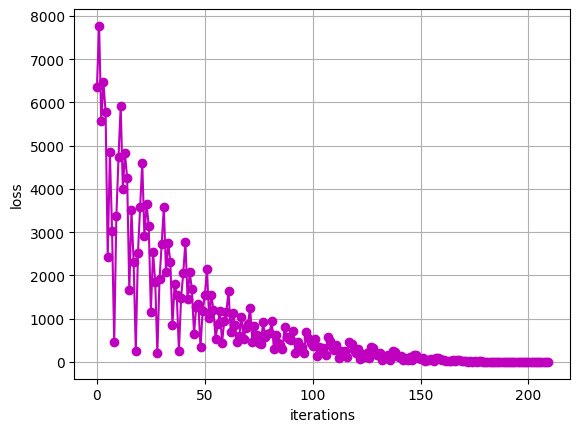

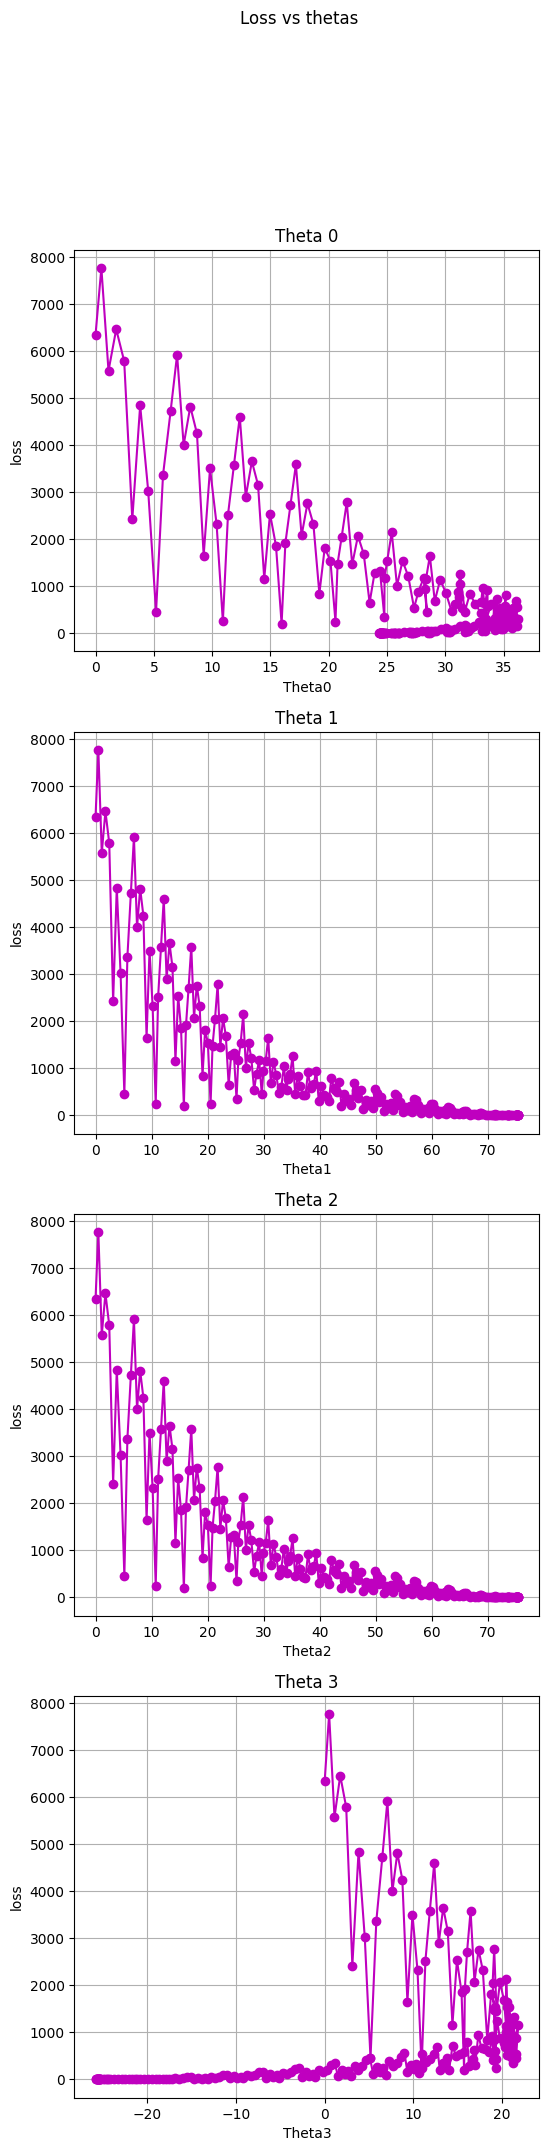

In [64]:
plotall(loss_history, thetas_history)

# Example 6

In [142]:
np.random.seed(1)
thetas, loss_history, thetas_history = Adam(x2,
                                            y2,
                                            lr=1,
                                            beta1=.9,
                                            beta2=.5,
                                            max_epochs=500,
                                            batch_size=5,
                                            scale=True,
                                            gra_threshold=.01,
                                            conv_threshold=.01)

****************** Epoch 1 ********************

Cost= 9238.568090614079
Gradient vector: [-133.92060259  -86.95579322  -71.20328562  -80.27328606]
Gradient Vector Norm: 192.37917275833126
Momentum Vector Norm:24802.72545517081
Thetas: [10.31317317 10.36213401 10.5251641  10.49266311]
****************** Epoch 2 ********************

Cost= 4760.064440685858
Gradient vector: [-96.95089879 -61.20387286 -49.64767763 -56.3518188 ]
Gradient Vector Norm: 137.0613373799084
Momentum Vector Norm:14297.012951102157
Thetas: [24.77955782 24.89484661 25.12915892 25.10775279]
****************** Epoch 3 ********************

Cost= 1368.9031837128705
Gradient vector: [-52.05184663 -29.91591941 -23.45556438 -27.2861737 ]
Gradient Vector Norm: 69.99325501746907
Momentum Vector Norm:4793.71152884544
Thetas: [42.44259247 42.92128859 43.12290556 43.20594092]
****************** Epoch 4 ********************

Cost= 557.7597386354269
Gradient vector: [17.36344129 18.54244497 17.13061003 17.73877011]
Gradient Ve

In [143]:
y_pred2 = np.column_stack((np.ones(x2.shape[0]), minmaxscale(x2))) @ thetas
print(f"r2_score: {r2_score(y2,y_pred2)}")

r2_score: 0.9833497414483399


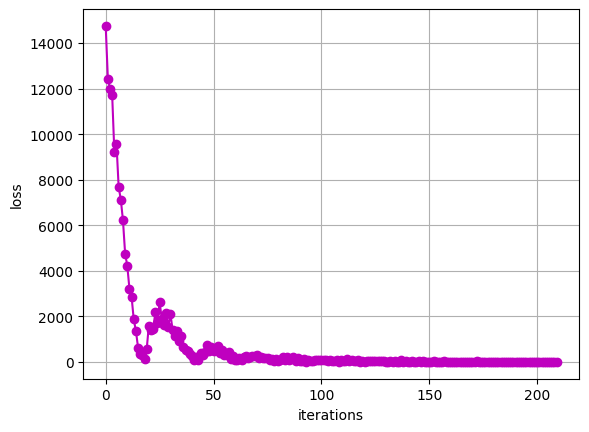

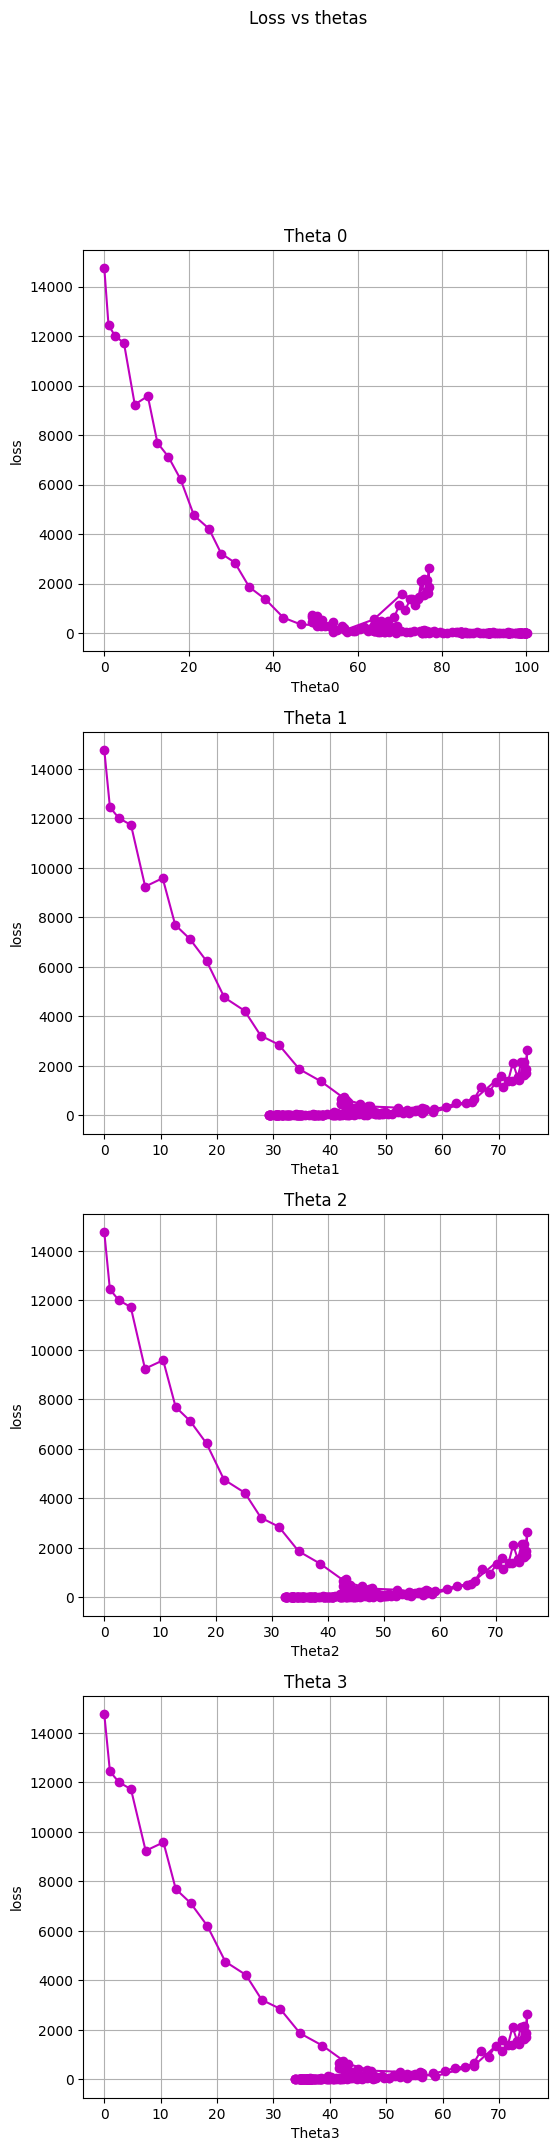

In [144]:
plotall(loss_history, thetas_history)

In [31]:
x = np.linspace(0,20)
a=-2
b=1
y=a*x+b